<a href="https://colab.research.google.com/github/MSoniaGL/Jupyter-notebook/blob/main/Clasimag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install opencv-python

In [5]:
!pip install tensorflow==2.18.0

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os

# Importamos TF2 y Keras
import tensorflow as tf
from tensorflow import keras

#Usaremos datetime para nombrar archivos
import datetime

import numpy as np
import matplotlib.pyplot as plt

#para cargar imágenes desde internet usaremos estas librerías
from PIL import Image
import requests
from io import BytesIO

# lo usaremos para reescalar imagen
import cv2

#!rm -rf ./logs/

#nos aseguramos de que estemos con tf 2.0
print(tf.__version__)

2.18.0


In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


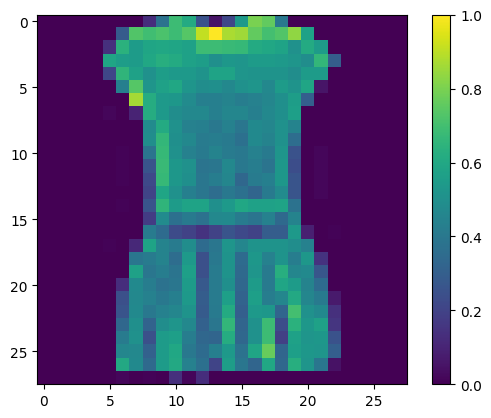

In [22]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']

In [21]:
train_images[3].shape

(28, 28)

In [11]:
test_images.shape

(10000, 28, 28)

In [15]:
train_labels.shape

(60000,)

In [16]:
test_labels.shape

(10000,)

In [13]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [17]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   3,   1,   0,   0,   7,   0,  37,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   2,   0,  27,  84,  11,   0,   0,   0,   0,   0,   0, 119,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,  88, 143, 110,   0,   0,   0,   0,  22,  93, 106,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          4,   0,  53, 129, 120, 147, 175, 157, 166, 135, 154, 168, 140,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
          0,  11, 137, 130, 128, 160, 176, 159, 167, 178, 149, 151, 144,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   2,   1,   0,   3,   0,
          0, 115, 114, 106, 137, 168, 153, 156, 165, 167, 143, 157, 158,
         11,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   3,   0,   0,
         89, 139,  90,  94, 153, 149, 131, 151, 169, 172, 143, 159, 169,
         48,   0],
       [  0,   0,   0,   0,   0,   0,   2,   4,   1,   0,   0,   0,  98,
        136, 110, 109, 110, 162, 135, 144, 149, 159, 167, 144, 158, 169,
        119,   0],
       [  0,   0,   2,   2,   1,   2,   0,   0,   0,   0,  26, 108, 117,
         99, 111, 117, 136, 156, 134, 154, 154, 156, 160, 141, 147, 156,
        178,   0],
       [  3,   0,   0,   0,   0,   0,   0,  21,  53,  92, 117, 111, 103,
        115, 129, 134, 143, 154, 165, 170, 154, 151, 154, 143, 138, 150,
        165,  43],
       [  0,   0,  23,  54,  65,  76,  85, 118, 128, 123, 111, 113, 118,
        127, 125, 139, 133, 136, 160, 140, 155, 161, 144, 155, 172, 161,
        189,  62],
       [  0,  68,  94,  90, 111, 114, 111, 114, 115, 127, 135, 136, 143,
        126, 127, 151, 154, 143, 148, 125, 162, 162, 144, 138, 153, 162,
        196,  58],
       [ 70, 169, 129, 104,  98, 100,  94,  97,  98, 102, 108, 106, 119,
        120, 129, 149, 156, 167, 190, 190, 196, 198, 198, 187, 197, 189,
        184,  36],
       [ 16, 126, 171, 188, 188, 184, 171, 153, 135, 120, 126, 127, 146,
        185, 195, 209, 208, 255, 209, 177, 245, 252, 251, 251, 247, 220,
        206,  49],
       [  0,   0,   0,  12,  67, 106, 164, 185, 199, 210, 211, 210, 208,
        190, 150,  82,   8,   0,   0,   0, 178, 208, 188, 175, 162, 158,
        151,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [18]:
train_images = train_images / 255.0
test_images = test_images / 255.0

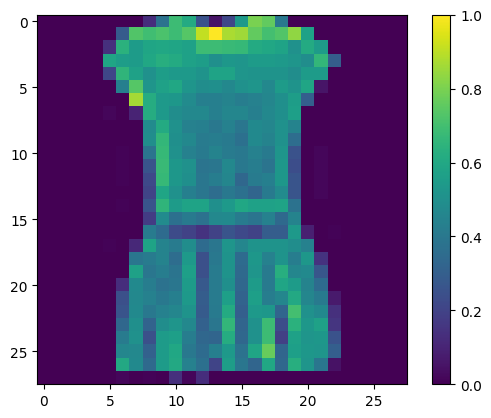

In [20]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

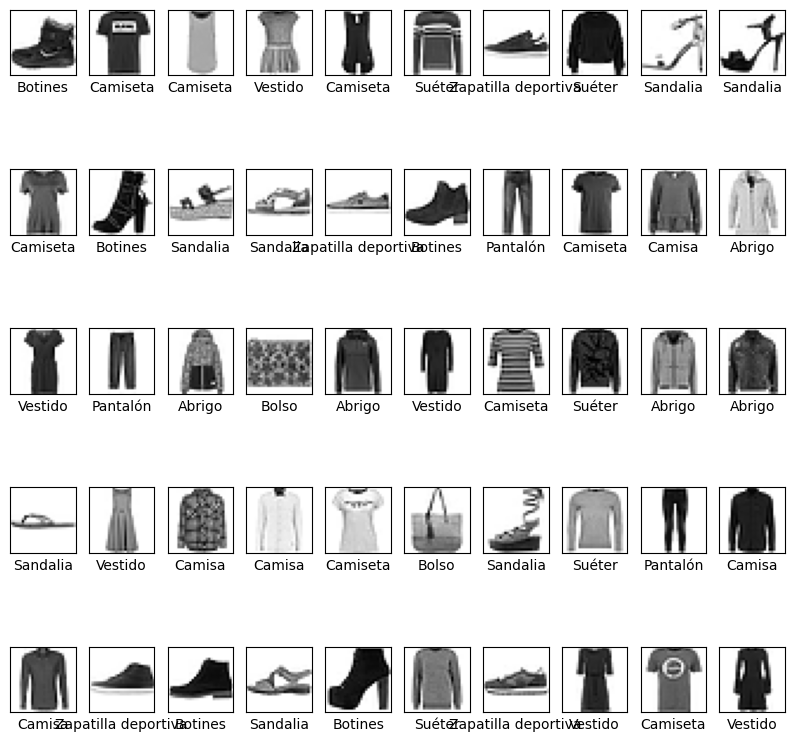

In [23]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()